# Visualiserer data
Bruker seaborn til å lage grafer med verdiene våre, i førsteomgang kun for et år

   Unnamed: 0        date                      elementId  value  unit
0           0  1975-01-01      mean(air_temperature P1D)  -1.35  degC
1           1  1975-01-01           mean(wind_speed P1D)   1.00   m/s
2           2  1975-01-01  sum(precipitation_amount P1D)   3.70    mm
3           3  1975-01-02      mean(air_temperature P1D)  -0.75  degC
4           4  1975-01-02           mean(wind_speed P1D)   1.00   m/s


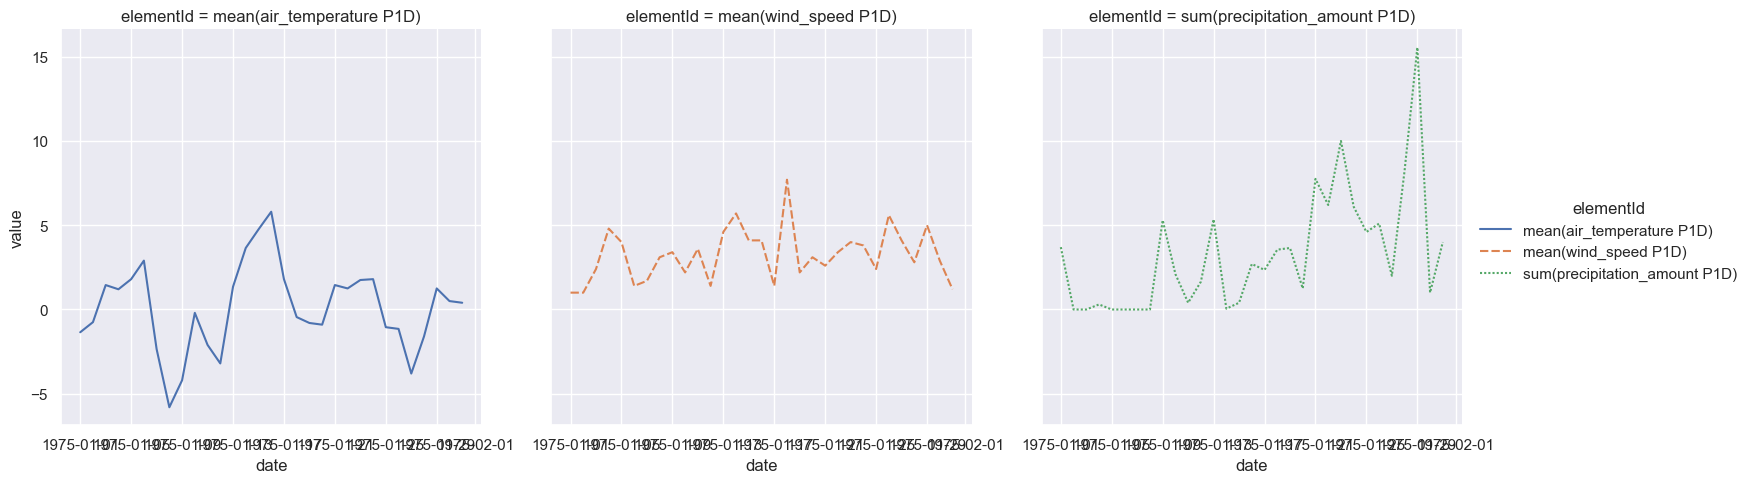

In [4]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

df = pd.read_csv("../data/gjsnitt_data.csv") 

print(df.head())

df["date"] = pd.to_datetime(df["date"])  # Konverter til datoformat
df_filtered = df[df["date"].dt.year == 1975]  # Velger kun 1975-data

df_jan = df_filtered[(df_filtered["date"].dt.year == 1975) & (df_filtered["date"].dt.month == 1)] #Velger kun data fra én måned. 

sns.set_theme()

sns.relplot(
    data=df_jan, kind="line",
    x="date", y="value", col="elementId", 
    hue="elementId", style="elementId",
    facet_kws=dict(sharex=False),
)

C:\Users\kaiaf\AppData\Local\Temp\ipykernel_37764\4270184462.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["date"] = pd.to_datetime(df_filtered["date"])  # Konverter til datoformat


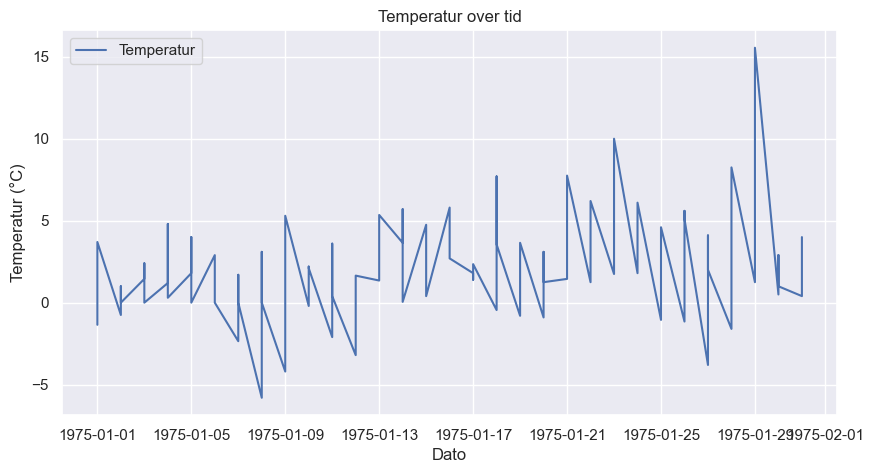

In [5]:

import pandas as pd
import matplotlib.pyplot as plt

# 1. Lese inn CSV-filen
df = pd.read_csv("../data/gjsnitt_data.csv")

# 2. Konvertere dato-kolonnen til datetime-format (hvis aktuelt)
df["date"] = pd.to_datetime(df["date"])

df["value"] = pd.to_numeric(df["value"], errors="coerce")  # Konverterer til tall

df_temp = df[df["elementId"].str.contains("air_temperature")]

# 3. Filtrer data om nødvendig (f.eks. bare lufttemperatur)
df_filtered = df[df["elementId"] == "mean(air_temperature P1D)"]

df_filtered["date"] = pd.to_datetime(df_filtered["date"])  # Konverter til datoformat
df_filtered_interval = df[df["date"].dt.year == 1975]  # Velger kun 1975-data



# 4. Plot data
plt.figure(figsize=(10, 5))
plt.plot(df_jan["date"], df_jan["value"], linestyle='-', color="b", label="Temperatur")

# 5. Tilpasse plottet
plt.xlabel("Dato")
plt.ylabel("Temperatur (°C)")
plt.title("Temperatur over tid")
plt.legend()
plt.grid(True)

# 6. Vise plottet
plt.show()

In [6]:


import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import requests
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets

# Widget for dato-intervall
dato_slider = widgets.SelectionRangeSlider(
    options=df_filtered['date'].dt.date.unique().tolist(),
    index=(0, 30),
    description='Dato:',
    layout={'width': '80%'}
)

def oppdater_graf(maaling, dato_range):
    start, slutt = pd.to_datetime(dato_range[0]), pd.to_datetime(dato_range[1])
    filtrert = df_filtered[
        (df_filtered['type'] == maaling) &
        (df_filtered['date'] >= start) &
        (df_filtered['date'] <= slutt)
    ]
    
    fig = px.line(filtrert, x='date', y='value', title=f"{maaling.title()} over tid")
    fig.update_layout(yaxis_title=f"Verdi ({filtrert['unit'].iloc[0] if not filtrert.empty else ''})")
    fig.show()

# Koble widgets til funksjon
widgets.interact(oppdater_graf, maaling=valgt_type, dato_range=dato_slider)

NameError: name 'valgt_type' is not defined